#**Impact on Bias-Variance Trade-Off**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=42)

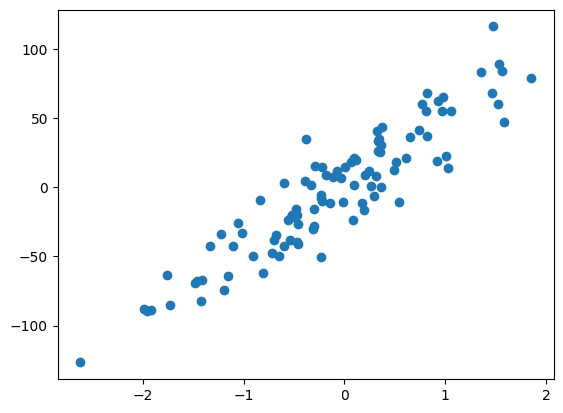

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [7]:
from sklearn.linear_model import Lasso

In [9]:
from mlxtend.evaluate import bias_variance_decomp

loss = []
var = []
bias = []

alphas = np.linspace(0,30,100)

for i in alphas:
  L = Lasso(alpha=i)
  avg_loss, avg_bias, avg_var = bias_variance_decomp(L,X_train,y_train,X_test,y_valid,loss='mse',random_seed=123)
  loss.append(avg_loss)
  var.append(avg_var)
  bias.append(avg_bias)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.309e+03, tolerance: 1.649e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

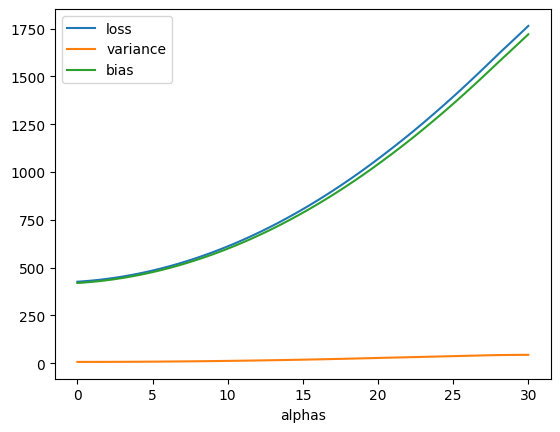

In [10]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,var,label='variance')
plt.plot(alphas,bias,label='bias')
plt.xlabel('alphas')
plt.legend();
plt.show();

#**Effect on Regularization**

[47.13323967]
2.3302306410539453


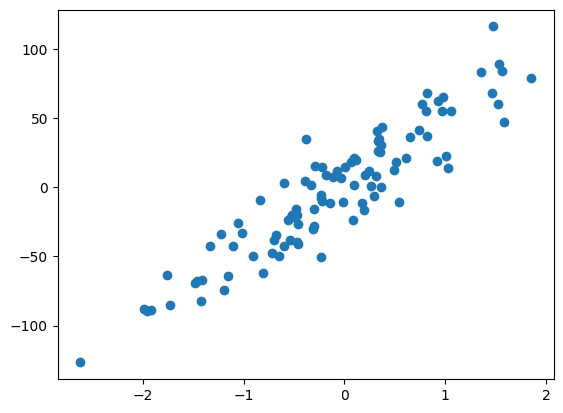

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)
plt.scatter(X,y);

[47.01076902]
2.317512491067463


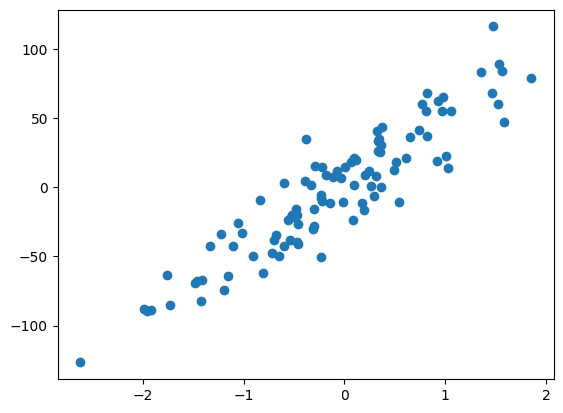

In [30]:
L = Lasso(alpha=0.1)
L.fit(X,y)
print(L.coef_)
print(L.intercept_)
plt.scatter(X,y);

In [36]:
def cal_loss(m,alpha):
  return (np.sum((y-m*X.ravel()-2.33)**2))+ alpha*abs(m)

In [37]:
def predict(m):
  return m*X+2.33

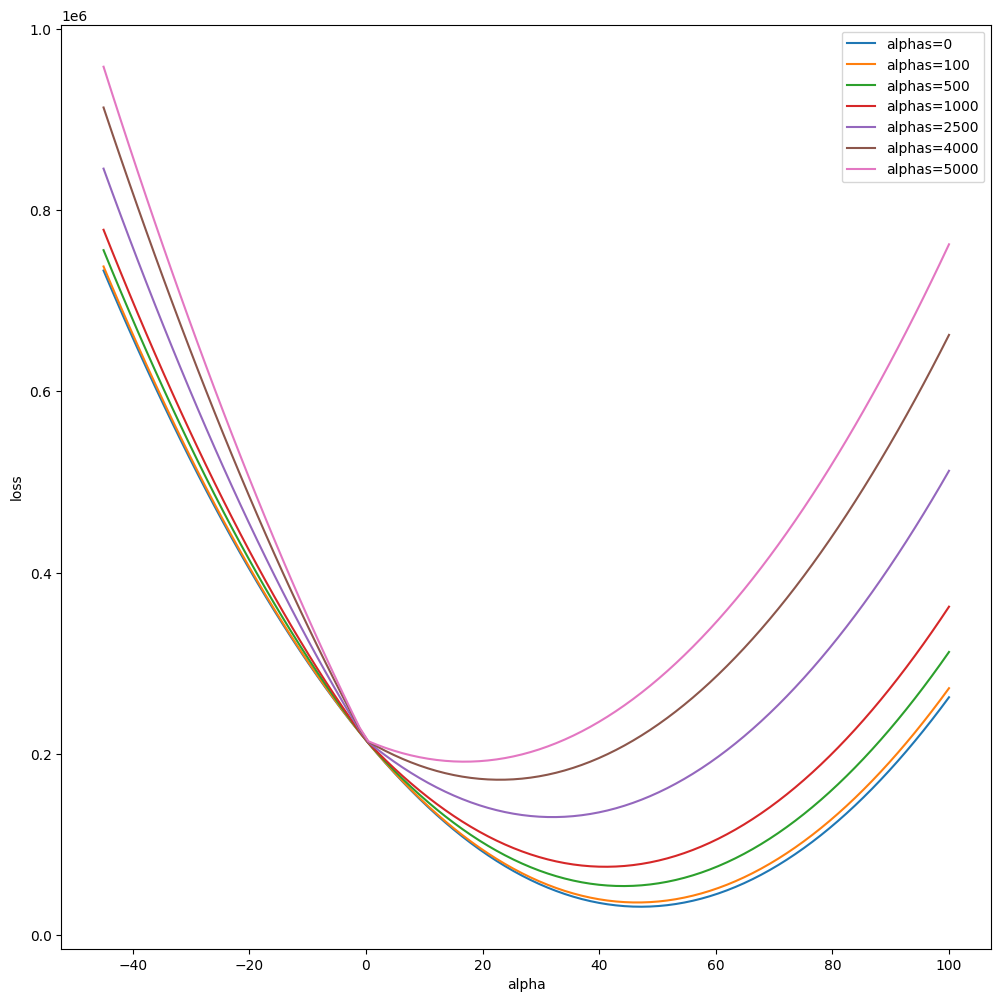

In [38]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))

for i in [0,100,500,1000,2500,4000,5000]:
  loss = []
  for j in range(m.shape[0]):
    loss_i = cal_loss(m[j],i)
    loss.append(loss_i)
  plt.plot(m,loss,label=f"alphas={i}")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("loss")
plt.show();